In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

from tqdm import tqdm

sns.set(style='whitegrid')

In [2]:
output_path = 'data/comments-data'
plots_path = 'data/plots'

In [3]:
def calculate_change(first, second):
    change = abs(first - second) / first * 100
    if first > second:
        return f'down {change}%'
    return f'up {change}%'

In [4]:
df = pd.read_excel('data/sentiment_emotions.xlsx')
df

,id,nrComments,nrThreads,nrReplies,maxThreadLength,disabled,nrAuthors,nrAuthors3Posts,maxPostsByAuthor,url,...,reply_mean_sentiment,reply_VADER_sentiment_classify,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,uqwvf6R1_QY,141,19,41,493,False,99,11,8,https://www.youtube.com/watch?v=uqwvf6R1_QY,...,0.058856,Positive,0.1036,0.1539,0.0805,0.1474,0.1107,0.1094,0.0704,0.2241
1,yiw6_JakZFc,150,26,50,458,False,111,7,17,https://www.youtube.com/watch?v=yiw6_JakZFc,...,0.064645,Positive,0.1074,0.1476,0.0748,0.1598,0.1241,0.1192,0.0706,0.1967
2,eRLJscAlk1M,118,10,19,500,False,115,0,2,https://www.youtube.com/watch?v=eRLJscAlk1M,...,0.043310,Neutral,0.1195,0.1388,0.0884,0.1303,0.1375,0.1212,0.0681,0.1963
3,EhAemz1v7dQ,165,31,65,388,False,118,9,8,https://www.youtube.com/watch?v=EhAemz1v7dQ,...,0.059929,Positive,0.0997,0.1545,0.0879,0.1561,0.1184,0.1137,0.0726,0.1971
4,wbR-5mHI6bo,128,17,28,445,False,103,9,3,https://www.youtube.com/watch?v=wbR-5mHI6bo,...,0.061022,Positive,0.1037,0.1496,0.0798,0.1603,0.1211,0.1204,0.0686,0.1966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Ff3yjCmMy9A,4,0,0,0,False,3,0,2,https://www.youtube.com/watch?v=Ff3yjCmMy9A,...,-0.144600,Negative,0.0938,0.1562,0.0625,0.0938,0.2188,0.0625,0.0312,0.2812
126,nm5LlWNqkJY,2,0,0,0,False,1,0,2,https://www.youtube.com/watch?v=nm5LlWNqkJY,...,NaN,Error,0.2000,0.2000,0.2000,0.4000,0.0000,0.0000,0.0000,0.0000
127,YVQWd5mXYVQ,1,0,0,0,False,1,0,1,https://www.youtube.com/watch?v=YVQWd5mXYVQ,...,NaN,Error,0.0000,0.2000,0.2000,0.2000,0.0000,0.0000,0.0000,0.4000
128,e75rohU1kn4,1,0,0,0,False,1,0,1,https://www.youtube.com/watch?v=e75rohU1kn4,...,NaN,Error,0.0000,0.1600,0.0000,0.1200,0.1200,0.0800,0.0800,0.4400


In [79]:
# separate videos on climate change stance
pro_videos = df[df['Pro or agai'] == 'Pro']
against_videos = df[df['Pro or agai'] == 'Against']
both_videos = df[df['Pro or agai'] == 'Both']
neither_videos = df[df['Pro or agai'] == 'Neither']

[Text(0, 0, '76'), Text(0, 0, '19'), Text(0, 0, '29'), Text(0, 0, '6')]

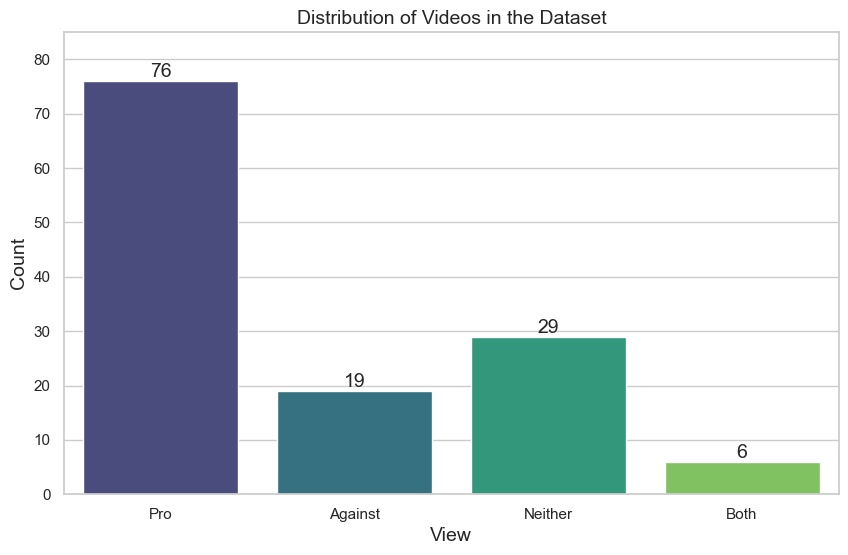

In [7]:
# plot for or against climate change
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Pro or agai", data=df, order=["Pro","Against","Neither","Both"], palette='viridis')
plt.title("Distribution of Videos in the Dataset", size=14)
plt.xlabel("View", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,85)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/Distribution of Videos in the Dataset.png", dpi=300)

In [18]:
# get number of comments
num_comments = [len(pd.read_json(f'{output_path}/{vid}/{vid}.json', lines=True)) for vid in df['id']]
sum(num_comments)

877174

# Analysis 

## 1. Sentiment 

### Sentiment ratio

In [165]:
# create ratios
def create_sentiment_ratio(df):
    nr_replies = df['nr_reply_pos_comments'] + df['nr_reply_neg_comments'] + df['nr_reply_neu_comments']
    nr_parents = df['commentCount'] - nr_replies

    data = {
        'pos_comments_ratio': [df['nr_pos_comments'].sum()/df['commentCount'].sum()],
        'neg_comments_ratio': [df['nr_neg_comments'].sum()/df['commentCount'].sum()],
        'neu_comments_ratio': [df['nr_neu_comments'].sum()/df['commentCount'].sum()],

        'reply_pos_comments_ratio': [df['nr_reply_pos_comments'].sum()/nr_replies.sum()],
        'reply_neg_comments_ratio': [df['nr_reply_neg_comments'].sum()/nr_replies.sum()],
        'reply_neu_comments_ratio': [df['nr_reply_neu_comments'].sum()/nr_replies.sum()],

        'parent_pos_comments_ratio': [df['nr_parent_pos_comments'].sum()/nr_parents.sum()],
        'parent_neg_comments_ratio': [df['nr_parent_neg_comments'].sum()/nr_parents.sum()],
        'parent_neu_comments_ratio': [df['nr_parent_neu_comments'].sum()/nr_parents.sum()]
    }

    sentiment_ratio_df = pd.DataFrame(data)
    return sentiment_ratio_df

In [ ]:
# calculate number of specific sentiment in each video
sentiment_label_dict = {}
reply_sentiment_label_dict = {}

for i, yt_id in enumerate(df['id'].tolist()):    
    temp_df = pd.read_json(f'{output_path}/{yt_id}/{yt_id}_sentiment.json')
    
    nr_pos_comments = temp_df[temp_df['VADER_sentiment_classify'] == 'Positive']
    nr_neg_comments = temp_df[temp_df['VADER_sentiment_classify'] == 'Negative']
    nr_neu_comments = temp_df[temp_df['VADER_sentiment_classify'] == 'Neutral']

    nr_reply_pos_comments = temp_df[(temp_df['VADER_sentiment_classify'] == 'Positive') & (temp_df['reply'] == True)]
    nr_reply_neg_comments = temp_df[(temp_df['VADER_sentiment_classify'] == 'Negative') & (temp_df['reply'] == True)]
    nr_reply_neu_comments = temp_df[(temp_df['VADER_sentiment_classify'] == 'Neutral') & (temp_df['reply'] == True)]
    
    df.loc[i, 'nr_pos_comments'] = len(nr_pos_comments)
    df.loc[i, 'nr_neg_comments'] = len(nr_neg_comments)
    df.loc[i, 'nr_neu_comments'] = len(nr_neu_comments)
    
    df.loc[i, 'nr_reply_pos_comments'] = len(nr_reply_pos_comments)
    df.loc[i, 'nr_reply_neg_comments'] = len(nr_reply_neg_comments)
    df.loc[i, 'nr_reply_neu_comments'] = len(nr_reply_neu_comments)


df['nr_parent_pos_comments'] = df['nr_pos_comments'] - df['nr_reply_pos_comments']
df['nr_parent_neg_comments'] = df['nr_neg_comments'] - df['nr_reply_neg_comments']
df['nr_parent_neu_comments'] = df['nr_neu_comments'] - df['nr_reply_neu_comments']

df

### Overall Sentiment

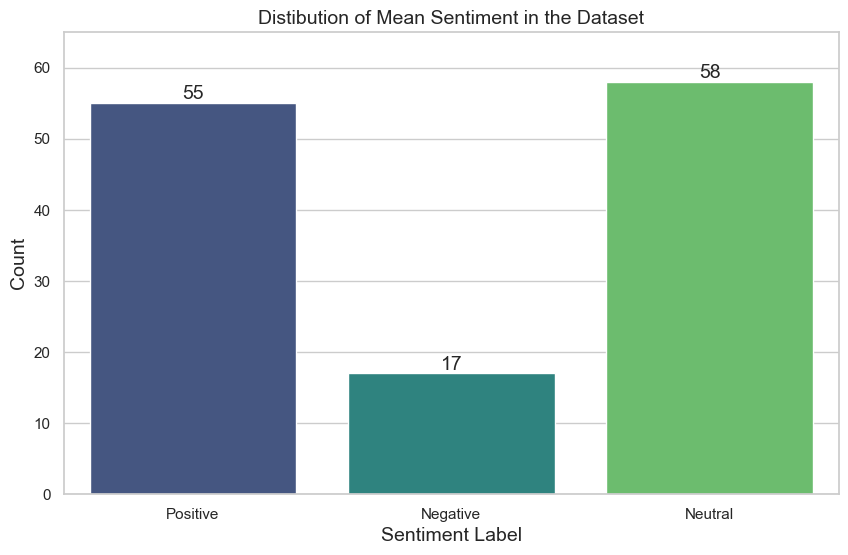

In [465]:
# distribution of mean sentiment
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="VADER_sentiment_classify", data=df, order=["Positive", "Negative", "Neutral"], palette='viridis')
plt.title("Distibution of Mean Sentiment in the Dataset", size=14)
plt.xlabel("Sentiment Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,65)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/Sentiment/Distibution of Mean Sentiment in the Dataset.png", dpi=300)

[Text(0, 0, '0.432912'), Text(0, 0, '0.349398'), Text(0, 0, '0.254337')]

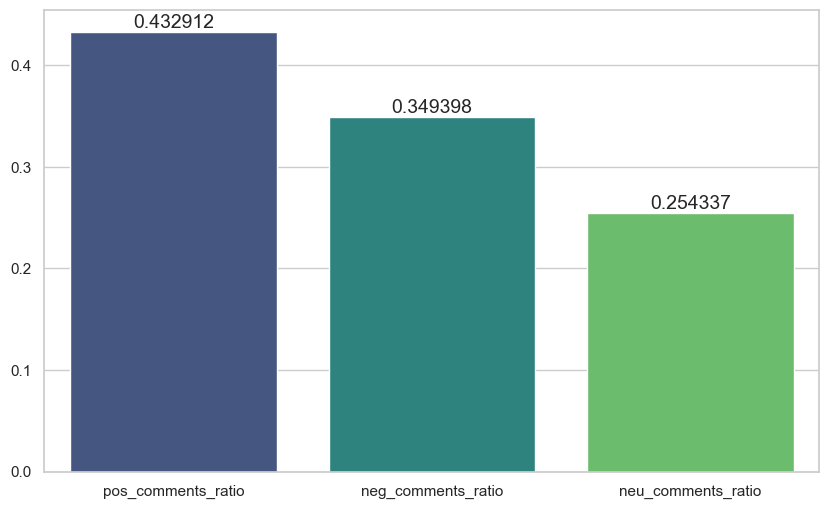

In [76]:
# ratios rather than mean
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=create_sentiment_ratio(df)[['pos_comments_ratio', 'neg_comments_ratio', 'neu_comments_ratio']], palette='viridis')
ax.bar_label(ax.containers[0], size=14, label_type='edge')

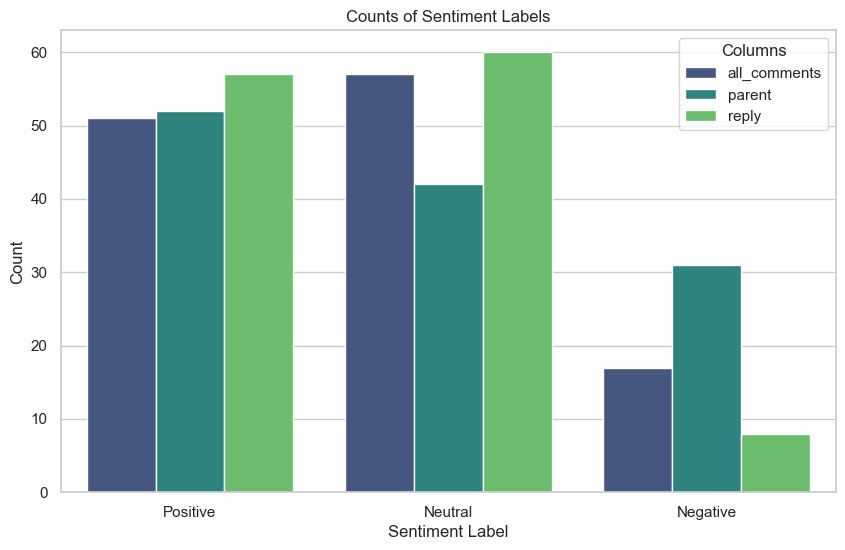

In [84]:
sentiment_columns = ['all_comments', 'parent', 'reply']
sentiment_values = ['positive', 'negative', 'neutral']

# remove columns with Error
tmp = df[df['reply_VADER_sentiment_classify'] != 'Error']
tmp = tmp.rename(columns={'VADER_sentiment_classify': 'all_comments', 'parent_VADER_sentiment_classify': 'parent', 'reply_VADER_sentiment_classify':' reply'})
counts_df = pd.DataFrame({col: tmp[col].value_counts() for col in sentiment_columns}).T

# fill any missing sentiment values with 0
counts_df = counts_df.fillna(0).astype(int)

# reset index to have columns as proper data columns
counts_df.reset_index(inplace=True)
counts_df.rename(columns={'index': 'column'}, inplace=True)

# melt the DataFrame to create a "tidy" format for seaborn
counts_df_melted = pd.melt(counts_df, id_vars='column', var_name='sentiment', value_name='count')

# plot the bar graph
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x='sentiment', y='count', hue='column', data=counts_df_melted, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Counts of Sentiment Labels')
plt.legend(title='Columns')
# ax.figure.savefig("data/analysis/Sentiment/Counts of Sentiment Labels.png", dpi=300)

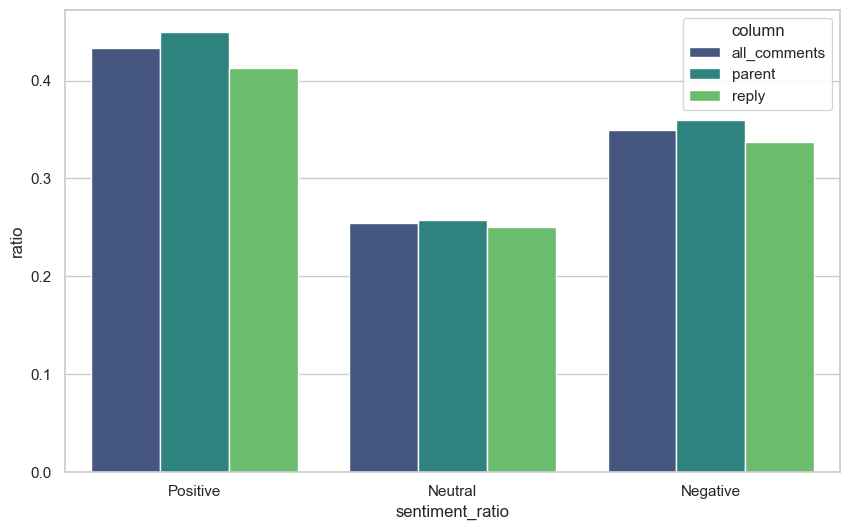

In [115]:
sent_ratio = create_sentiment_ratio(df)
data = {
        'column': ['all_comments', 'parent', 'reply'],
        'Negative': [sent_ratio['neg_comments_ratio'].iloc[0], sent_ratio['parent_neg_comments_ratio'].iloc[0], sent_ratio['reply_neg_comments_ratio'].iloc[0]],
        'Neutral': [sent_ratio['neu_comments_ratio'].iloc[0], sent_ratio['parent_neu_comments_ratio'].iloc[0], sent_ratio['reply_neu_comments_ratio'].iloc[0]],
        'Positive': [sent_ratio['pos_comments_ratio'].iloc[0], sent_ratio['parent_pos_comments_ratio'].iloc[0], sent_ratio['reply_pos_comments_ratio'].iloc[0]]
    }

ratio_df = pd.DataFrame(data)
ratio_df_melted = pd.melt(ratio_df, id_vars='column', var_name='sentiment_ratio', value_name='ratio')

plt.figure(figsize=(10, 6))  
ax = sns.barplot(x='sentiment_ratio', y='ratio', hue='column', data=ratio_df_melted, order=['Positive', 'Neutral', 'Negative'], palette='viridis')

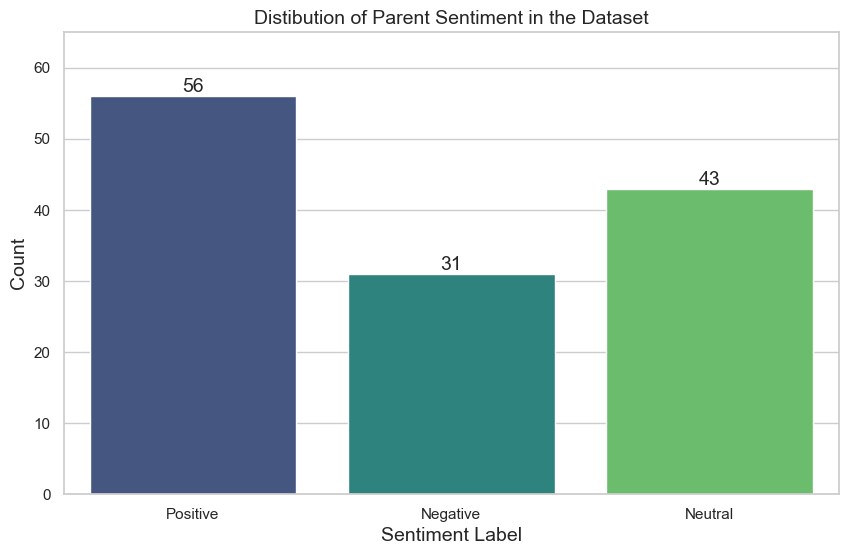

In [467]:
# distribution of parent sentiment
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="parent_VADER_sentiment_classify", data=df, order=["Positive", "Negative", "Neutral"], palette='viridis')
plt.title("Distibution of Parent Sentiment in the Dataset", size=14)
plt.xlabel("Sentiment Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,65)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/Sentiment/Distibution of Parent Sentiment in the Dataset.png", dpi=300)

- Number of negative sentiment compared to all comments has gone up from 17 to 31 (up ~82%).
- Number of neutral sentiment compared to all comments has gone down from 57 to 42 (down ~26%).
- Therefore, users are more opinionated when putting down a first comment. This makes sense as people that choose to comment on social media are usually not indifferent about an issue. If they choose to comment, they typically see something heavily for or against their ideals and views.

[Text(0, 0, '0.449704'), Text(0, 0, '0.360122'), Text(0, 0, '0.257933')]

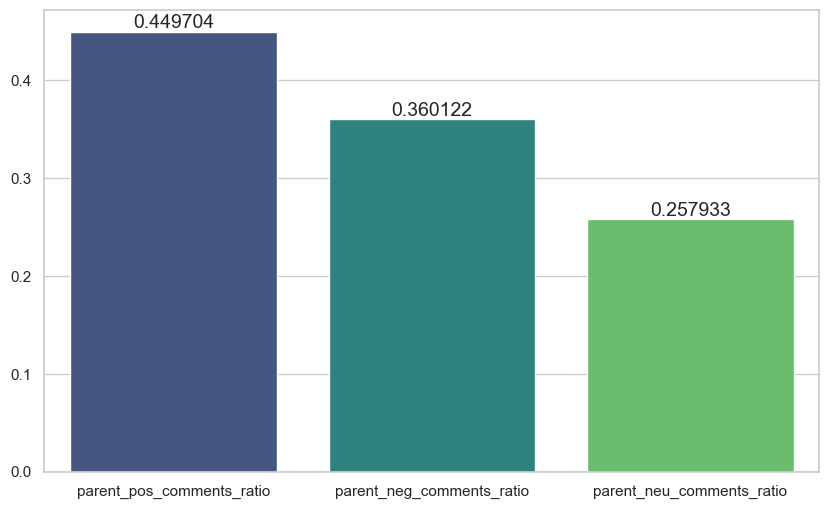

In [77]:
# ratios rather than mean
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=create_sentiment_ratio(df)[['parent_pos_comments_ratio', 'parent_neg_comments_ratio', 'parent_neu_comments_ratio']], palette='viridis')
ax.bar_label(ax.containers[0], size=14, label_type='edge')

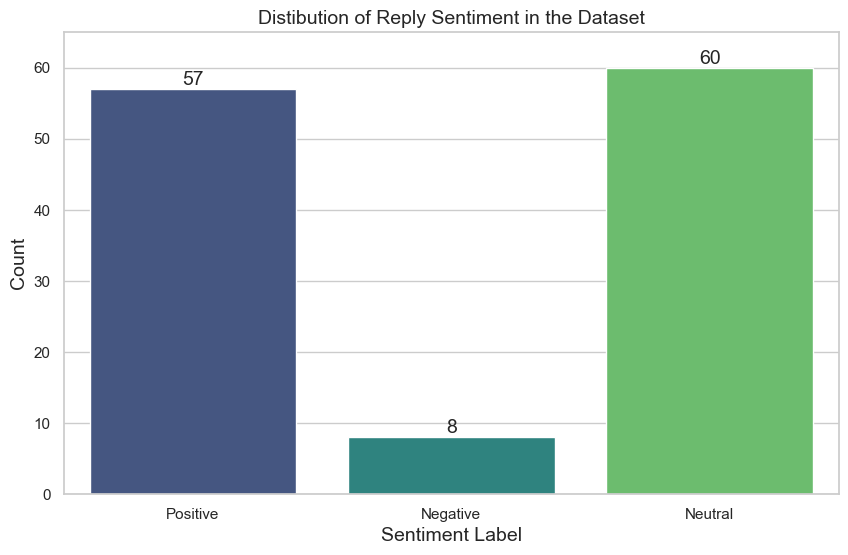

In [468]:
# distribution of reply sentiment
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="reply_VADER_sentiment_classify", data=df, order=["Positive", "Negative", "Neutral"], palette='viridis')
plt.title("Distibution of Reply Sentiment in the Dataset", size=14)
plt.xlabel("Sentiment Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,65)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
ax.figure.savefig("data/analysis/Sentiment/Distibution of Reply Sentiment in the Dataset.png", dpi=300)

- Number of negative sentiment has gone down from 17 to 8 (down ~53%) compared to all comments, and has gone down from 31 to 8 (down ~74%) compared to parent comments.
- Number of positive comments compared to parent comments has increased (up ~10%) and the neutral comments has gone up from 42 to 60 (up ~43%) compared to parent comments.
- Therefore, users are less negative and more neutral in replies to comments. 

[Text(0, 0, '0.413133'), Text(0, 0, '0.336765'), Text(0, 0, '0.250102')]

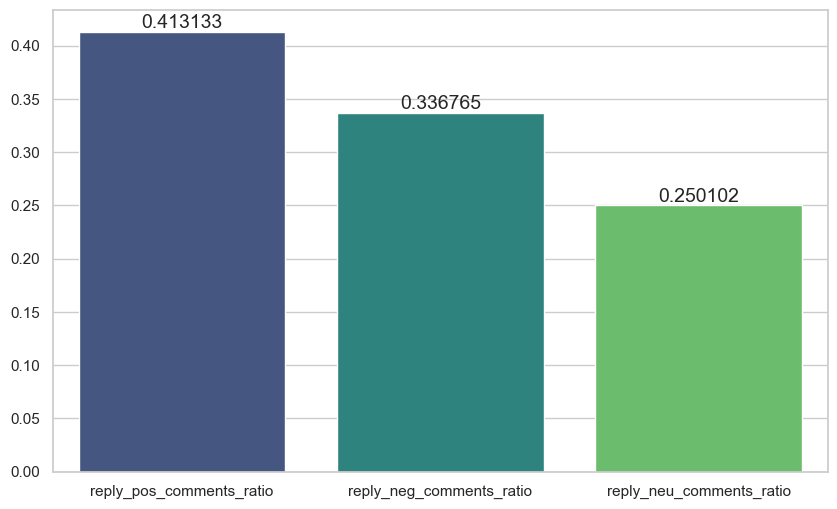

In [78]:
# ratios rather than mean
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=create_sentiment_ratio(df)[['reply_pos_comments_ratio', 'reply_neg_comments_ratio', 'reply_neu_comments_ratio']], palette='viridis')
ax.bar_label(ax.containers[0], size=14, label_type='edge')

### Pro/Against/Both/Neither Video Sentiment

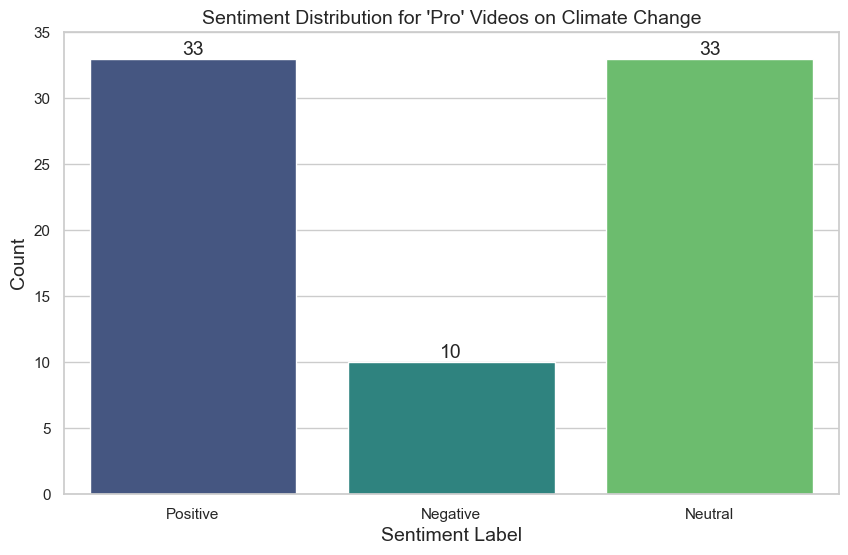

In [516]:
# sentiment distribution for 'Pro' videos
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="VADER_sentiment_classify", data=df[df['Pro or agai'] == 'Pro'], order=["Positive", "Negative", "Neutral"], palette='viridis')
plt.title("Sentiment Distribution for 'Pro' Videos on Climate Change", size=14)
plt.xlabel("Sentiment Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0, 35)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
ax.figure.savefig("data/analysis/Sentiment/Sentiment Distribution for Pro Videos on Climate Change.png", dpi=300)

[Text(0, 0, '0.43428'), Text(0, 0, '0.322744'), Text(0, 0, '0.262752')]

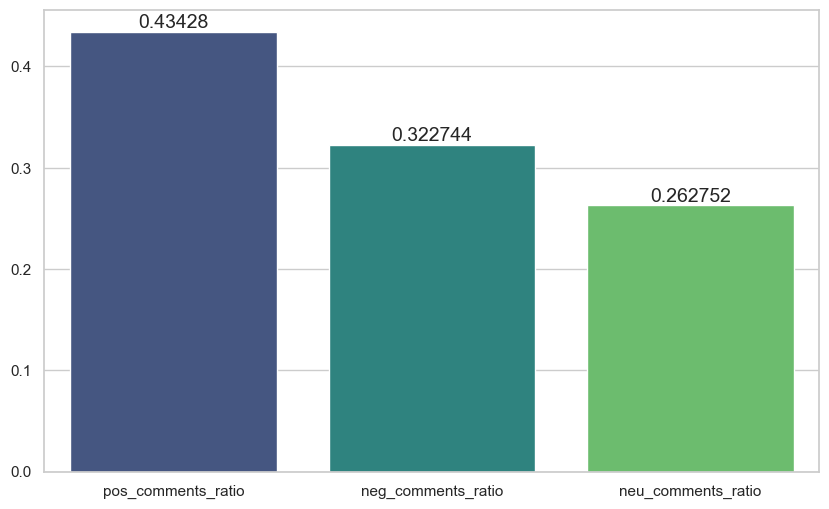

In [82]:
# ratios rather than mean
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=create_sentiment_ratio(pro_videos)[['pos_comments_ratio', 'neg_comments_ratio', 'neu_comments_ratio']], palette='viridis')
ax.bar_label(ax.containers[0], size=14, label_type='edge')

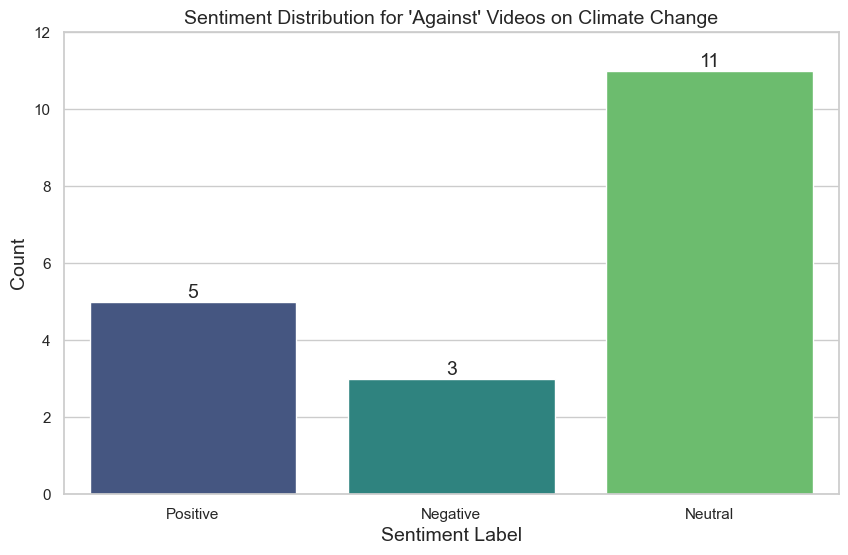

In [517]:
# sentiment distribution for 'Against' videos
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="VADER_sentiment_classify", data=df[df['Pro or agai'] == 'Against'], order=["Positive", "Negative", "Neutral"], palette='viridis')
plt.title("Sentiment Distribution for 'Against' Videos on Climate Change", size=14)
plt.xlabel("Sentiment Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0, 12)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
ax.figure.savefig("data/analysis/Sentiment/Sentiment Distribution for Against Videos on Climate Change.png", dpi=300)

[Text(0, 0, '0.388427'), Text(0, 0, '0.390372'), Text(0, 0, '0.252586')]

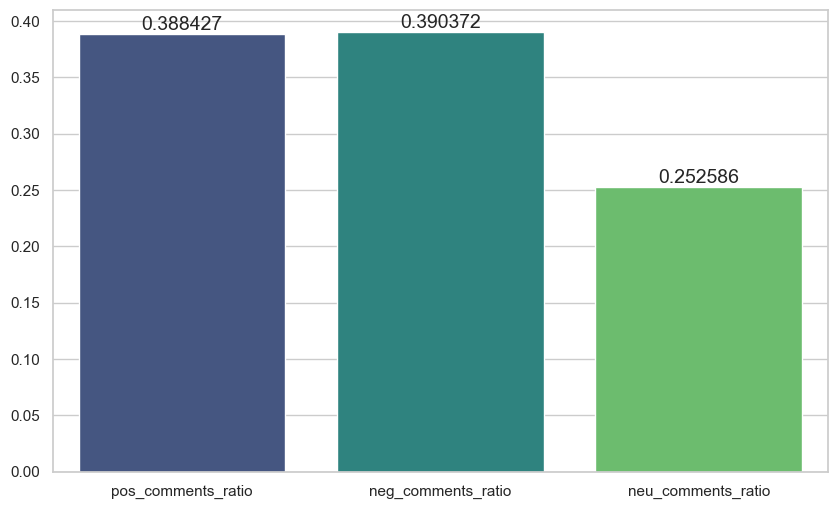

In [83]:
# ratios rather than mean
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=create_sentiment_ratio(against_videos)[['pos_comments_ratio', 'neg_comments_ratio', 'neu_comments_ratio']], palette='viridis')
ax.bar_label(ax.containers[0], size=14, label_type='edge')

In [161]:
sent_ratio_pro = create_sentiment_ratio(pro_videos)
sent_ratio_agai = create_sentiment_ratio(against_videos)

data = {
        'column': ['all_comments', 'parent', 'reply', 'all_comments', 'parent', 'reply'],
        'type': ['pro', 'pro', 'pro', 'agai', 'agai', 'agai'],
        'Negative': [
            sent_ratio_pro['neg_comments_ratio'].iloc[0], sent_ratio_pro['parent_neg_comments_ratio'].iloc[0], sent_ratio_pro['reply_neg_comments_ratio'].iloc[0],
            sent_ratio_agai['neg_comments_ratio'].iloc[0], sent_ratio_agai['parent_neg_comments_ratio'].iloc[0], sent_ratio_agai['reply_neg_comments_ratio'].iloc[0]
        ],
        'Neutral': [
            sent_ratio_pro['neu_comments_ratio'].iloc[0], sent_ratio_pro['parent_neu_comments_ratio'].iloc[0], sent_ratio_pro['reply_neu_comments_ratio'].iloc[0],
            sent_ratio_agai['neu_comments_ratio'].iloc[0], sent_ratio_agai['parent_neu_comments_ratio'].iloc[0], sent_ratio_agai['reply_neu_comments_ratio'].iloc[0]
        ],
        'Positive': [
            sent_ratio_pro['pos_comments_ratio'].iloc[0], sent_ratio_pro['parent_pos_comments_ratio'].iloc[0], sent_ratio_pro['reply_pos_comments_ratio'].iloc[0],
            sent_ratio_agai['pos_comments_ratio'].iloc[0], sent_ratio_agai['parent_pos_comments_ratio'].iloc[0], sent_ratio_agai['reply_pos_comments_ratio'].iloc[0]
        ]
    }

ratio_df = pd.DataFrame(data)
ratio_df_melted = pd.melt(ratio_df, id_vars=['column', 'type'], var_name='sentiment', value_name='ratio')
ratio_df_melted

,column,type,sentiment,ratio
0,all_comments,pro,Negative,0.322744
1,parent,pro,Negative,0.319540
2,reply,pro,Negative,0.326782
3,all_comments,agai,Negative,0.390372
4,parent,agai,Negative,0.429102
5,reply,agai,Negative,0.338861
6,all_comments,pro,Neutral,0.262752
7,parent,pro,Neutral,0.261919
8,reply,pro,Neutral,0.263802
9,all_comments,agai,Neutral,0.252586


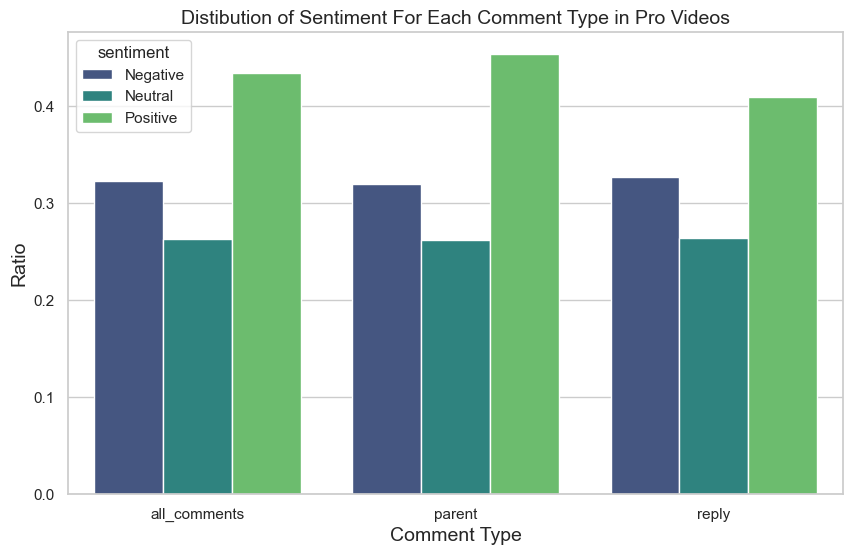

In [162]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='column', y='ratio', hue='sentiment', data=ratio_df_melted[ratio_df_melted['type'] == 'pro'],  palette='viridis')
plt.title("Distibution of Sentiment For Each Comment Type in Pro Videos", size=14)
plt.xlabel("Comment Type", size=14)
plt.ylabel("Ratio", size=14)
ax.figure.savefig("data/analysis/Sentiment/Distibution of Sentiment For Each Comment Type in Pro Videos.png", dpi=300)

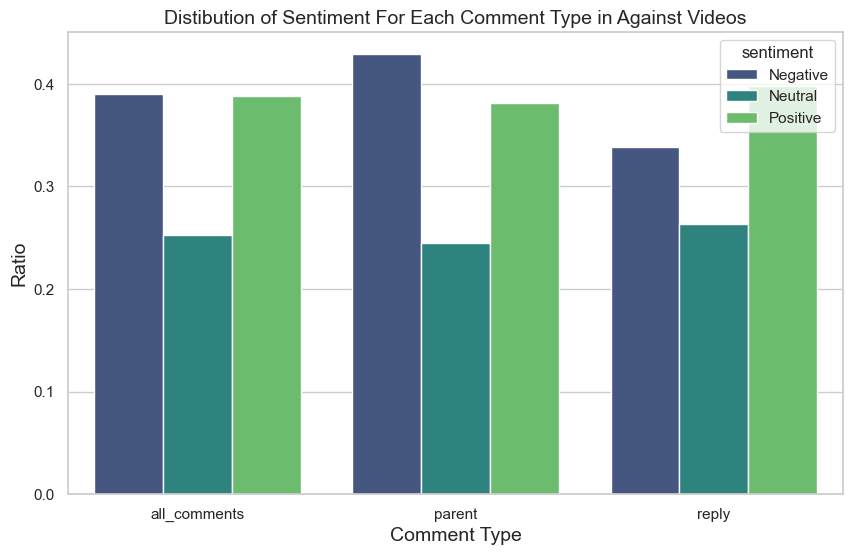

In [164]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='column', y='ratio', hue='sentiment', data=ratio_df_melted[ratio_df_melted['type'] == 'agai'],  palette='viridis')
plt.title("Distibution of Sentiment For Each Comment Type in Against Videos", size=14)
plt.xlabel("Comment Type", size=14)
plt.ylabel("Ratio", size=14)
ax.figure.savefig("data/analysis/Sentiment/Distibution of Sentiment For Each Comment Type in Against Videos.png", dpi=300)

In [159]:
ratio_df_melted = ratio_df_melted.sort_values(by=['sentiment'])
ratio_df_melted

,column,type,sentiment,ratio
0,all_comments,pro,Negative,0.322744
1,parent,pro,Negative,0.319540
2,reply,pro,Negative,0.326782
3,all_comments,agai,Negative,0.390372
4,parent,agai,Negative,0.429102
5,reply,agai,Negative,0.338861
11,reply,agai,Neutral,0.263467
10,parent,agai,Neutral,0.244405
9,all_comments,agai,Neutral,0.252586
8,reply,pro,Neutral,0.263802


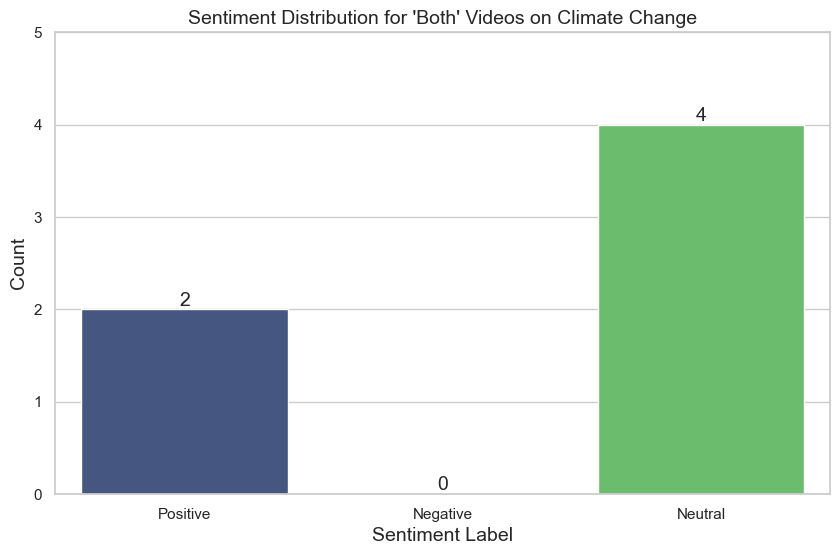

In [519]:
# sentiment distribution for 'Both' videos
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="VADER_sentiment_classify", data=df[df['Pro or agai'] == 'Both'], order=["Positive", "Negative", "Neutral"], palette='viridis')
plt.title("Sentiment Distribution for 'Both' Videos on Climate Change", size=14)
plt.xlabel("Sentiment Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0, 5)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
ax.figure.savefig("data/analysis/Sentiment/Sentiment Distribution for Both Videos on Climate Change.png", dpi=300)

[Text(0, 0, '15'), Text(0, 0, '4'), Text(0, 0, '10')]

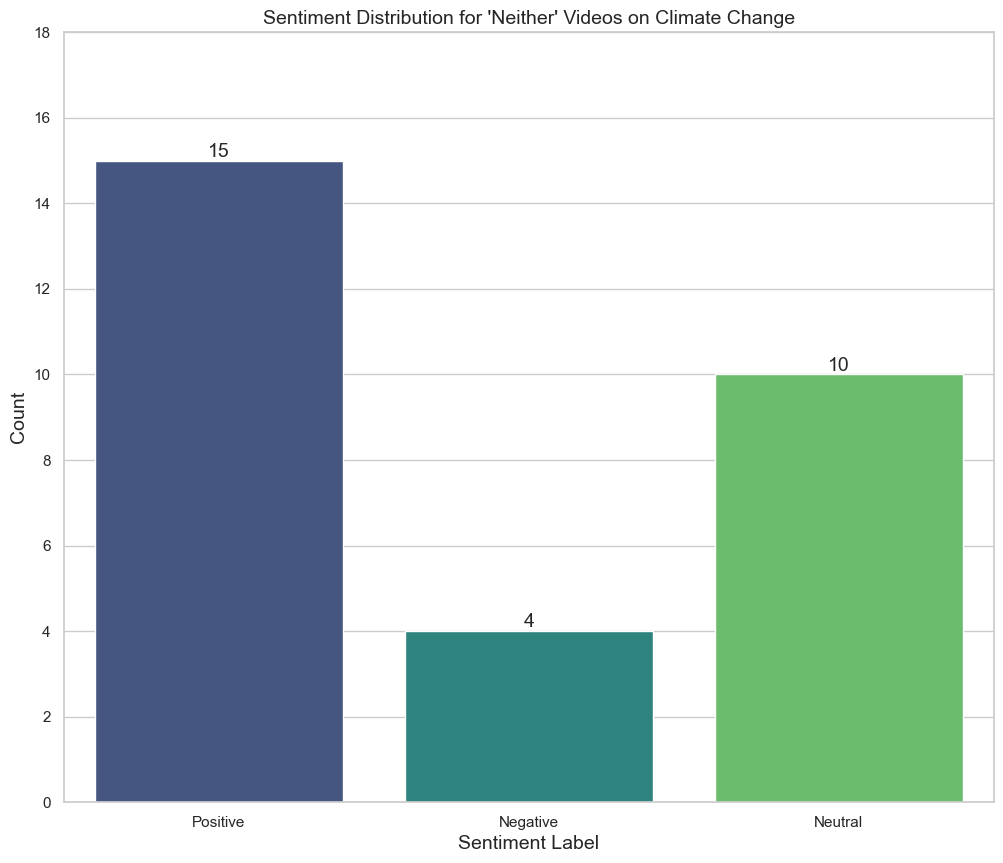

In [521]:
# sentiment distribution for 'Neither' videos
ax = sns.countplot(x="VADER_sentiment_classify", data=df[df['Pro or agai'] == 'Neither'], order=["Positive", "Negative", "Neutral"], palette='viridis')
plt.title("Sentiment Distribution for 'Neither' Videos on Climate Change", size=14)
plt.xlabel("Sentiment Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,18)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/Sentiment Distribution for Neither Videos on Climate Change.png", dpi=300)

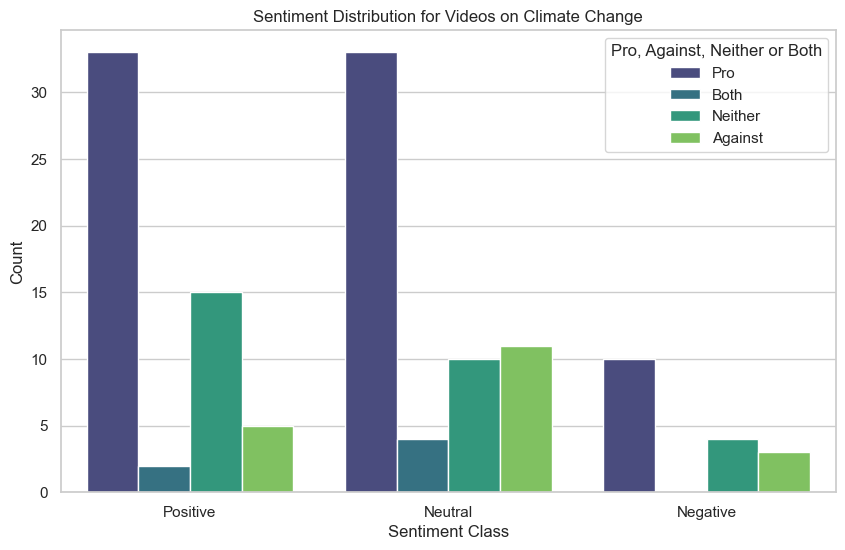

In [525]:
# sentiment distribution for Pro, Against, Both, Neither videos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VADER_sentiment_classify', hue='Pro or agai', palette='viridis')
plt.title("Sentiment Distribution for Videos on Climate Change")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.legend(title="Pro, Against, Neither or Both", loc='upper right')
# plt.savefig("data/analysis/Sentiment/Sentiment Distribution for Videos on Climate Change", dpi=300)

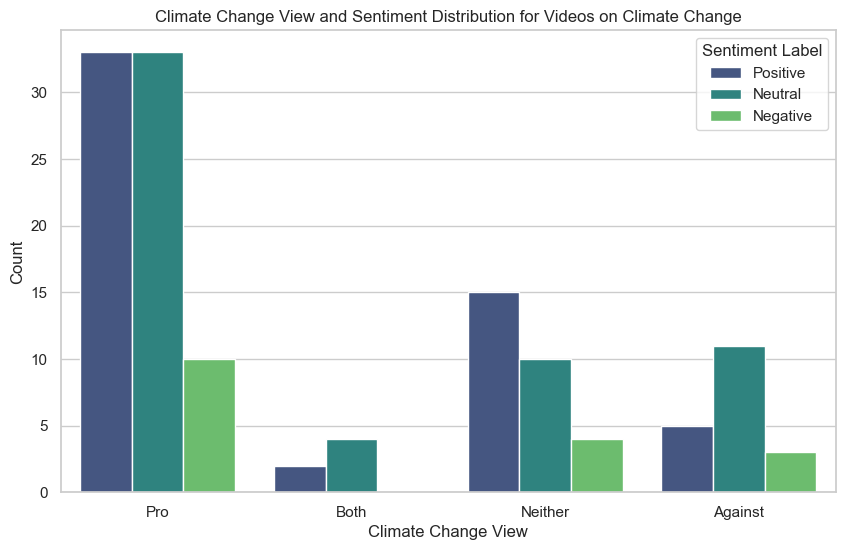

In [528]:
# sentiment distribution for Pro, Against, Both, Neither videos
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pro or agai', hue='VADER_sentiment_classify', palette='viridis')
plt.title("Climate Change View and Sentiment Distribution for Videos on Climate Change")
plt.xlabel("Climate Change View")
plt.ylabel("Count")
plt.legend(title="Sentiment Label", loc='upper right')
plt.savefig("data/analysis/Sentiment/Climate Change View and Sentiment Distribution for Videos on Climate Change", dpi=300)

- For Pro videos, positive videos make up 33/76 = ~43% of all the videos. 
- For Both videos, positive videos make up 2/6 = ~33% of all the videos. 
- For Neither videos, positive videos make up 15/29 = ~52% of all the videos. 
- For Against videos, positive videos make up 5/19 = ~26% of all the videos. 

<br/>

- It is evident that videos that argue for climate change are more positively received by the users that watch the videos rather than videos that argue against climate change. This means that there are more people that believe in climate change that choose to comment on videos arguing against climate change than there are people who do not believe in climate change and choose to comment in videos that believe in climate change. 

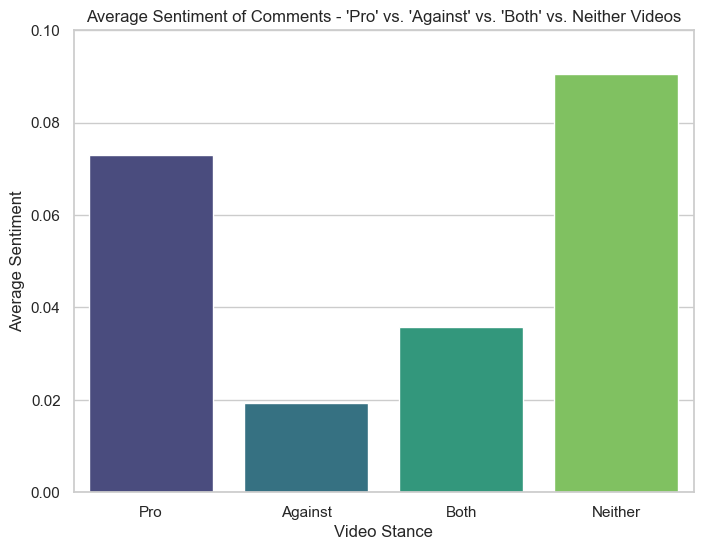

In [529]:
# calculate the average sentiment of mean comments for both groups
pro_avg_sentiment = pro_videos['mean_sentiment'].mean()
against_avg_sentiment = against_videos['mean_sentiment'].mean()
both_avg_sentiment = both_videos['mean_sentiment'].mean()
neither_avg_sentiment = neither_videos['mean_sentiment'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Pro', 'Against', 'Both', 'Neither'], y=[pro_avg_sentiment,against_avg_sentiment,both_avg_sentiment,neither_avg_sentiment], palette='viridis')
plt.title("Average Sentiment of Comments - 'Pro' vs. 'Against' vs. 'Both' vs. Neither Videos")
plt.xlabel("Video Stance")
plt.ylabel("Average Sentiment")
plt.ylim(0, 0.1)  
plt.show()

## 2. Emotions

In [315]:
# get the emotion with the highest value in a row
def get_max_emotion(row):
    max_emotion = max(emotions, key=lambda emotion: row[emotion])
    return max_emotion

# add to every item in list
def append_to_items(lst, str_):
    return [item + str_ for item in lst]

In [318]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
emotions_df = pd.read_excel('data/sentiment_emotions_parent_reply.xlsx')
emotions_df = emotions_df[['id', 'Pro or agai', *emotions, *append_to_items(emotions, '_parent'), *append_to_items(emotions, '_reply')]]
emotions_df

,id,Pro or agai,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,...,surprise_parent,trust_parent,anger_reply,anticipation_reply,disgust_reply,fear_reply,joy_reply,sadness_reply,surprise_reply,trust_reply
0,uqwvf6R1_QY,Pro,0.1036,0.1539,0.0805,0.1474,0.1107,0.1094,0.0704,0.2241,...,0.0733,0.2153,0.1084,0.1525,0.0803,0.1489,0.0997,0.1127,0.0689,0.2286
1,yiw6_JakZFc,Both,0.1074,0.1476,0.0748,0.1598,0.1241,0.1192,0.0706,0.1967,...,0.0736,0.1926,0.1104,0.1477,0.0783,0.1586,0.1170,0.1197,0.0669,0.2015
2,eRLJscAlk1M,Pro,0.1195,0.1388,0.0884,0.1303,0.1375,0.1212,0.0681,0.1963,...,0.0675,0.1983,0.1173,0.1369,0.0955,0.1446,0.1217,0.1234,0.0695,0.1911
3,EhAemz1v7dQ,Neither,0.0997,0.1545,0.0879,0.1561,0.1184,0.1137,0.0726,0.1971,...,0.0742,0.1976,0.1025,0.1486,0.0944,0.1612,0.1039,0.1217,0.0711,0.1967
4,wbR-5mHI6bo,Pro,0.1037,0.1496,0.0798,0.1603,0.1211,0.1204,0.0686,0.1966,...,0.0696,0.1940,0.1081,0.1488,0.0840,0.1577,0.1134,0.1215,0.0678,0.1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,hOdKBLDXH9o,Against,0.1077,0.1436,0.0994,0.1464,0.1243,0.1022,0.0470,0.2293,...,0.0452,0.2226,0.0962,0.1731,0.1154,0.0577,0.1731,0.0577,0.0577,0.2692
114,2M_xtMmaB9s,Pro,0.1923,0.1346,0.0865,0.2404,0.0769,0.0962,0.0096,0.1635,...,0.0175,0.1754,0.2340,0.1915,0.1064,0.2340,0.0426,0.0426,0.0000,0.1489
115,N7Qot_aax9M,Pro,0.1295,0.1116,0.1161,0.1964,0.1116,0.1295,0.0491,0.1562,...,0.0882,0.1176,0.1393,0.1066,0.1148,0.1803,0.1230,0.1311,0.0164,0.1885
116,E6wzsoB7Xoo,Pro,0.1452,0.1290,0.1129,0.2016,0.0565,0.1048,0.0484,0.2016,...,0.0476,0.1310,0.1250,0.2000,0.0750,0.1000,0.0750,0.0250,0.0500,0.3500


In [319]:
# pull out strongest emotion for each video
emotions_df['highest_emotion'] = emotions_df.apply(get_max_emotion, axis=1)
emotions_df

,id,Pro or agai,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,...,trust_parent,anger_reply,anticipation_reply,disgust_reply,fear_reply,joy_reply,sadness_reply,surprise_reply,trust_reply,highest_emotion
0,uqwvf6R1_QY,Pro,0.1036,0.1539,0.0805,0.1474,0.1107,0.1094,0.0704,0.2241,...,0.2153,0.1084,0.1525,0.0803,0.1489,0.0997,0.1127,0.0689,0.2286,trust
1,yiw6_JakZFc,Both,0.1074,0.1476,0.0748,0.1598,0.1241,0.1192,0.0706,0.1967,...,0.1926,0.1104,0.1477,0.0783,0.1586,0.1170,0.1197,0.0669,0.2015,trust
2,eRLJscAlk1M,Pro,0.1195,0.1388,0.0884,0.1303,0.1375,0.1212,0.0681,0.1963,...,0.1983,0.1173,0.1369,0.0955,0.1446,0.1217,0.1234,0.0695,0.1911,trust
3,EhAemz1v7dQ,Neither,0.0997,0.1545,0.0879,0.1561,0.1184,0.1137,0.0726,0.1971,...,0.1976,0.1025,0.1486,0.0944,0.1612,0.1039,0.1217,0.0711,0.1967,trust
4,wbR-5mHI6bo,Pro,0.1037,0.1496,0.0798,0.1603,0.1211,0.1204,0.0686,0.1966,...,0.1940,0.1081,0.1488,0.0840,0.1577,0.1134,0.1215,0.0678,0.1987,trust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,hOdKBLDXH9o,Against,0.1077,0.1436,0.0994,0.1464,0.1243,0.1022,0.0470,0.2293,...,0.2226,0.0962,0.1731,0.1154,0.0577,0.1731,0.0577,0.0577,0.2692,trust
114,2M_xtMmaB9s,Pro,0.1923,0.1346,0.0865,0.2404,0.0769,0.0962,0.0096,0.1635,...,0.1754,0.2340,0.1915,0.1064,0.2340,0.0426,0.0426,0.0000,0.1489,fear
115,N7Qot_aax9M,Pro,0.1295,0.1116,0.1161,0.1964,0.1116,0.1295,0.0491,0.1562,...,0.1176,0.1393,0.1066,0.1148,0.1803,0.1230,0.1311,0.0164,0.1885,fear
116,E6wzsoB7Xoo,Pro,0.1452,0.1290,0.1129,0.2016,0.0565,0.1048,0.0484,0.2016,...,0.1310,0.1250,0.2000,0.0750,0.1000,0.0750,0.0250,0.0500,0.3500,fear


In [320]:
# separate videos on climate change stance
pro_videos_emotions = emotions_df[emotions_df['Pro or agai'] == 'Pro']
against_videos_emotions = emotions_df[emotions_df['Pro or agai'] == 'Against']
both_videos_emotions = emotions_df[emotions_df['Pro or agai'] == 'Both']
neither_videos_emotions = emotions_df[emotions_df['Pro or agai'] == 'Neither']

### Overall 

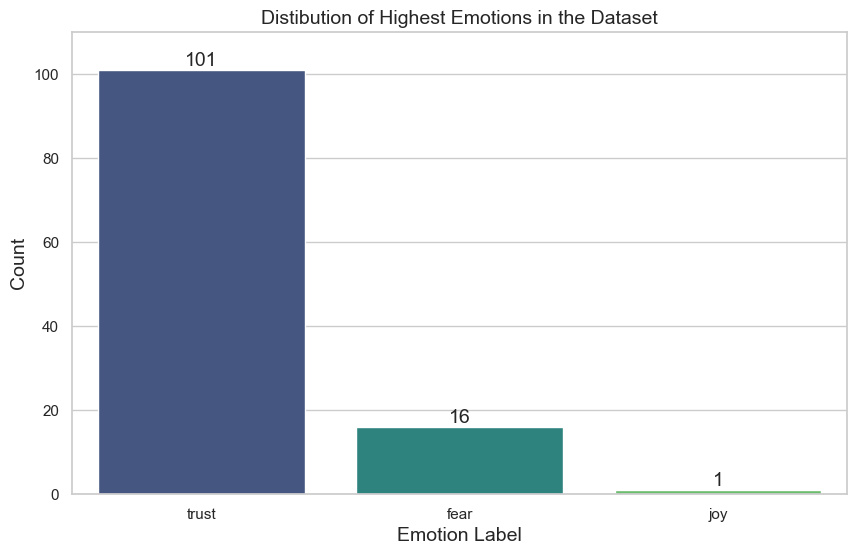

In [543]:
# emotions distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x="highest_emotion", data=emotions_df, palette='viridis')
plt.title("Distibution of Highest Emotions in the Dataset", size=14)
plt.xlabel("Emotion Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0, 110)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/Emotions/Distibution of Highest Emotions in the Dataset.png", dpi=300)

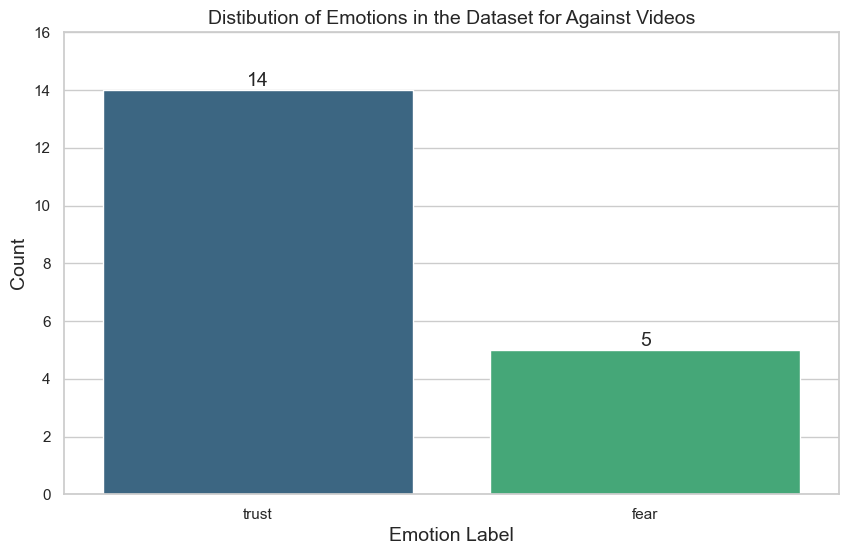

In [533]:
# Against videos - emotions distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x="highest_emotion", data=against_videos_emotions, palette='viridis')
plt.title("Distibution of Emotions in the Dataset for Against Videos", size=14)
plt.xlabel("Emotion Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,16)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/Distibution of Emotions in the Dataset for Against Videos.png", dpi=300)

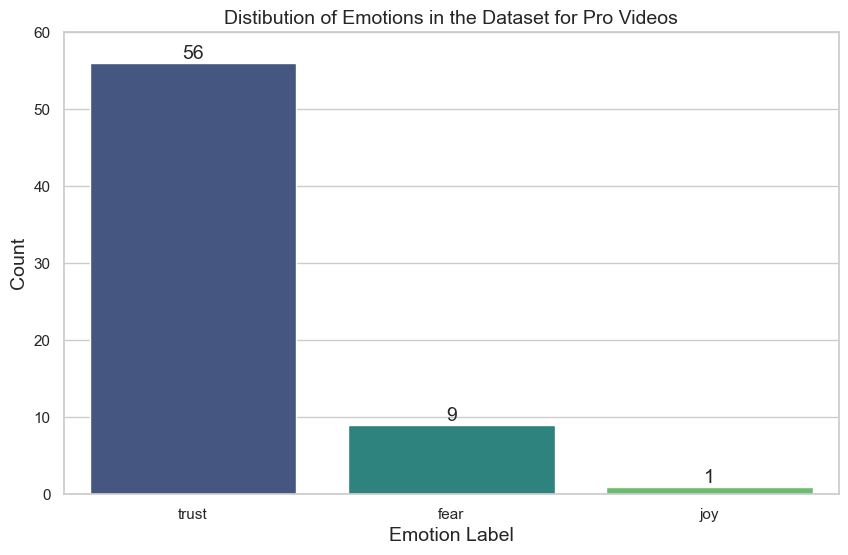

In [544]:
# Pro videos - emotions distribution
plt.figure(figsize=(10,6))
ax = sns.countplot(x="highest_emotion", data=pro_videos_emotions, palette='viridis')
plt.title("Distibution of Emotions in the Dataset for Pro Videos", size=14)
plt.xlabel("Emotion Label", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0, 60)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/Emotions/Distibution of Emotions in the Dataset for Pro Videos.png", dpi=300)

### Average

In [416]:
def create_mean_df(df, col_name):
    averages = df.mean()
    averages_df = pd.DataFrame(averages, columns=[col_name])
    averages_df.reset_index(inplace=True)
    melted_df = pd.melt(averages_df, id_vars='index', value_vars='average')
    melted_df = melted_df.sort_values(by='value', ascending=False)
    return melted_df

In [550]:
## All Videos

# get averages
all_ave_df = create_mean_df(emotions_df[emotions], col_name='all')
all_ave_parent_df = create_mean_df(emotions_df[append_to_items(emotions, '_parent')], col_name='parent')
all_ave_parent_df['index'] = all_ave_parent_df['index'].apply(lambda x: x.split('_')[0])
all_ave_reply_df = create_mean_df(emotions_df[append_to_items(emotions, '_reply')], col_name='reply')
all_ave_reply_df['index'] = all_ave_reply_df['index'].apply(lambda x: x.split('_')[0])

# join all, parent, replies
all_ave_all_parent_reply_df = pd.concat([all_ave_df, all_ave_parent_df, all_ave_reply_df])
all_ave_all_parent_reply_df = all_ave_all_parent_reply_df.sort_values(by=['index', 'variable', 'value'], ascending=[True, True, False])
all_ave_all_parent_reply_df['variable'] = pd.Categorical(all_ave_all_parent_reply_df['variable'], categories=['all', 'parent', 'reply'], ordered=True)
all_ave_all_parent_reply_df = all_ave_all_parent_reply_df.iloc[::-1]

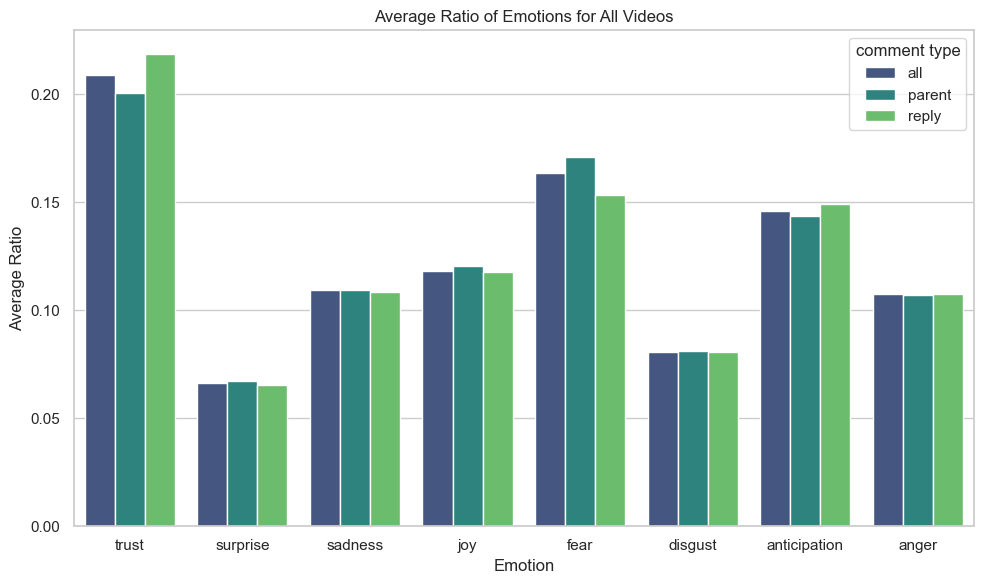

In [553]:
# Average Ratio of Emotions for All Videos - all, parent and replies
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=all_ave_all_parent_reply_df, x='index', y='value', hue='variable', palette='viridis')
plt.legend(title='comment type')
plt.xlabel('Emotion')
plt.ylabel('Average Ratio')
plt.title('Average Ratio of Emotions for All Videos')
plt.tight_layout()
# ax.figure.savefig("data/analysis/Emotions/Average Ratio of Emotions for All Videos (all,parent,reply).png", dpi=300)

In [440]:
## Pro Videos

# get averages
pro_ave_df = create_mean_df(pro_videos_emotions[emotions], col_name='all')
pro_ave_parent_df = create_mean_df(pro_videos_emotions[append_to_items(emotions, '_parent')], col_name='parent')
pro_ave_parent_df['index'] = pro_ave_parent_df['index'].apply(lambda x: x.split('_')[0])
pro_ave_reply_df = create_mean_df(pro_videos_emotions[append_to_items(emotions, '_reply')], col_name='reply')
pro_ave_reply_df['index'] = pro_ave_reply_df['index'].apply(lambda x: x.split('_')[0])

# join all, parent, replies
pro_ave_all_parent_reply_df = pd.concat([pro_ave_df, pro_ave_parent_df, pro_ave_reply_df])
pro_ave_all_parent_reply_df = pro_ave_all_parent_reply_df.sort_values(by=['index', 'variable', 'value'], ascending=[True, True, False])
pro_ave_all_parent_reply_df['variable'] = pd.Categorical(pro_ave_all_parent_reply_df['variable'], categories=['all', 'parent', 'reply'], ordered=True)
pro_ave_all_parent_reply_df = pro_ave_all_parent_reply_df.iloc[::-1]

In [426]:
## Against Videos

# get averages
agai_ave_df = create_mean_df(against_videos_emotions[emotions], col_name='all')
agai_ave_parent_df = create_mean_df(against_videos_emotions[append_to_items(emotions, '_parent')], col_name='parent')
agai_ave_parent_df['index'] = agai_ave_parent_df['index'].apply(lambda x: x.split('_')[0])
agai_ave_reply_df = create_mean_df(against_videos_emotions[append_to_items(emotions, '_reply')], col_name='reply')
agai_ave_reply_df['index'] = agai_ave_reply_df['index'].apply(lambda x: x.split('_')[0])

# join all, parent, replies
agai_ave_all_parent_reply_df = pd.concat([agai_ave_df, agai_ave_parent_df, agai_ave_reply_df])
agai_ave_all_parent_reply_df = agai_ave_all_parent_reply_df.sort_values(by=['index', 'variable', 'value'], ascending=[True, True, False])
agai_ave_all_parent_reply_df['variable'] = pd.Categorical(agai_ave_all_parent_reply_df['variable'], categories=['all', 'parent', 'reply'], ordered=True)
agai_ave_all_parent_reply_df = agai_ave_all_parent_reply_df.iloc[::-1]

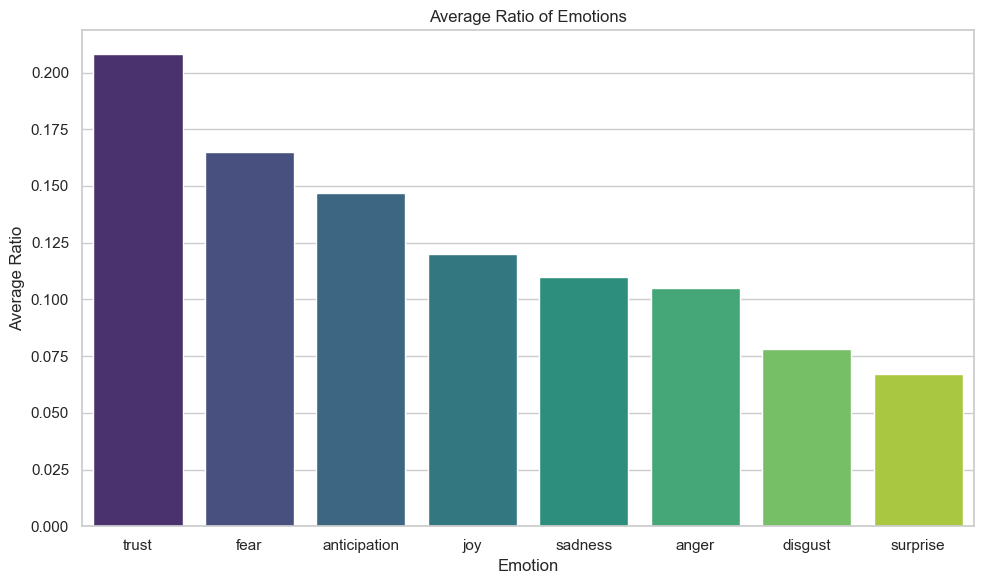

In [441]:
# Average Ratio of Emotions for Pro Videos - all
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y='value', data=pro_ave_df, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Average Ratio')
plt.title('Average Ratio of Emotions')
plt.tight_layout()
# ax.figure.savefig("data/analysis/Emotions/Average Ratio of Emotions for Pro Videos.png", dpi=300)

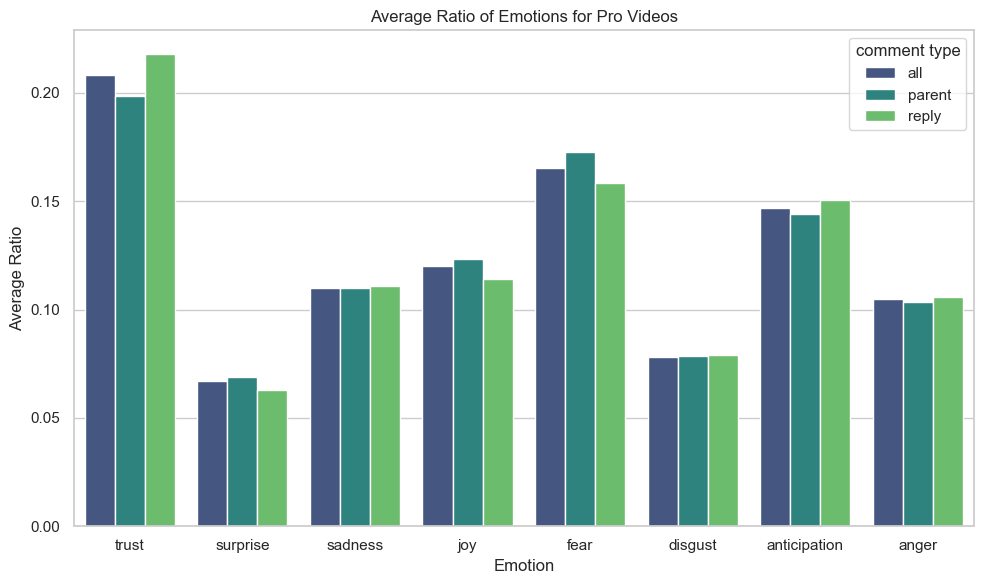

In [535]:
# Average Ratio of Emotions for Pro Videos - all, parent and replies
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pos_ave_all_parent_reply_df, x='index', y='value', hue='variable', palette='viridis')
plt.legend(title='comment type')
plt.xlabel('Emotion')
plt.ylabel('Average Ratio')
plt.title('Average Ratio of Emotions for Pro Videos')
plt.tight_layout()
# ax.figure.savefig("data/analysis/Emotions/Average Ratio of Emotions for Pro Videos (all,parent,reply).png", dpi=300)

- The most significant differences are: There is more surprise, joy and fear in top level (parent) comments and there is more trust and anticipation in replies to comments. 

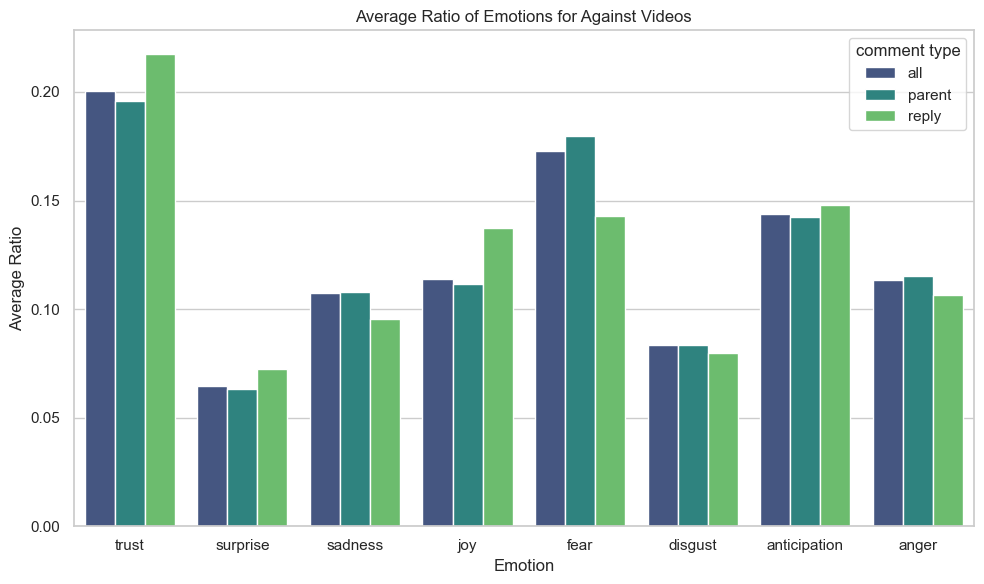

In [536]:
# Average Ratio of Emotions for Against Videos - all, parent and replies
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=agai_ave_all_parent_reply_df, x='index', y='value', hue='variable', palette='viridis')
plt.legend(title='comment type')
plt.xlabel('Emotion')
plt.ylabel('Average Ratio')
plt.title('Average Ratio of Emotions for Against Videos')
plt.tight_layout()
# ax.figure.savefig("data/analysis/Emotions/Average Ratio of Emotions for Against Videos (all,parent,reply).png", dpi=300)

- The most significant differences are: There is more sadness, fear and anger in top level (parent) comments and there is more trust, joy and anticipation in replies to comments. 

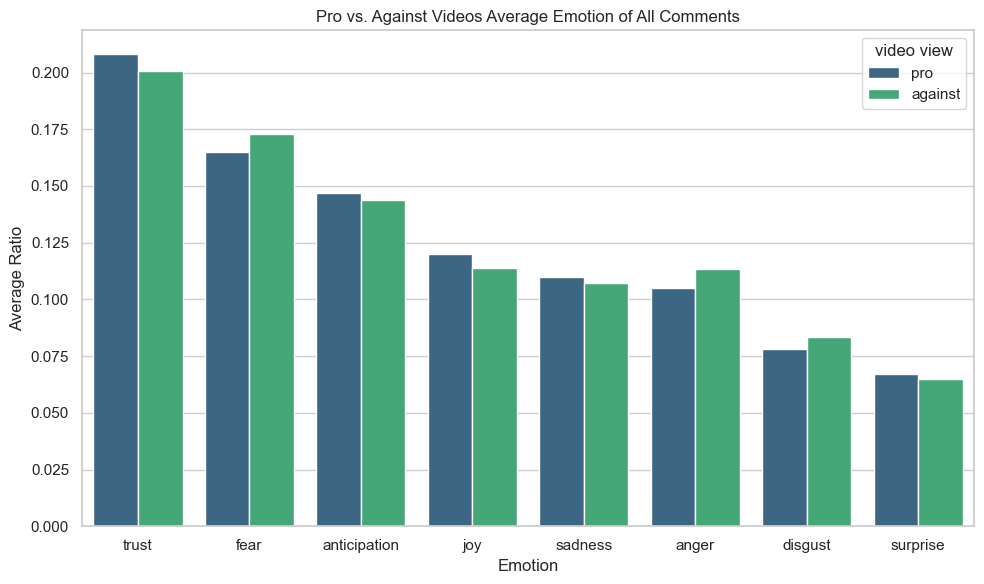

In [541]:
# Comparing Pro and Against Videos - All
pro_ave_df['view'] = ['pro']*8
agai_ave_df['view'] = ['against']*8
pro_agai_ave_df = pd.concat([pro_ave_df, agai_ave_df])

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pro_agai_ave_df, x='index', y='value', hue='view', palette='viridis')
plt.legend(title='video view')
plt.xlabel('Emotion')
plt.ylabel('Average Ratio')
plt.title('Pro vs. Against Videos Average Emotion of All Comments')
plt.tight_layout()
ax.figure.savefig("data/analysis/Emotions/ro vs. Against Videos Average Emotion of All Comments.png", dpi=300)

- For Pro videos, the comments envoke a higher trust and joy in the video than videos against climate change. Conversely, the comments in videos against climate have higher fear, anger and disgust than pro videos on climate change. This could be due to the fact that prto videos are based more on fact and logic and videos against climate change are usually more political and are based in conspiracy. The viewers of pro climate change videos are intereted in the video and trust its content. The viewers of climate change videos that are against climate change sre more angry and fearful. This could be because they are angry that the video is going against climate change or alternatively it could also be because the people who watch these videos are also against climate change and they are angry and disgusted that so much time is being out into stopping climate change when they don't believe in it. 

- Interestingly, viewers of pro videos also express more sadness than against videos. 

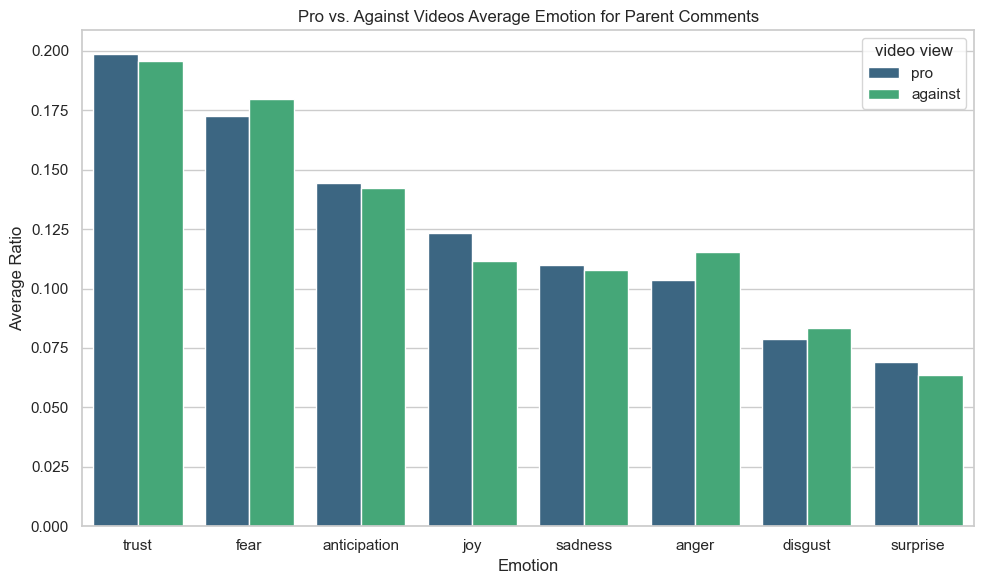

In [547]:
# Comparing Pro and Against Videos - Parent
pro_ave_parent_df['view'] = ['pro']*8
agai_ave_parent_df['view'] = ['against']*8
pro_agai_ave_parent_df = pd.concat([pro_ave_parent_df, agai_ave_parent_df])

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pro_agai_ave_parent_df, x='index', y='value', hue='view', palette='viridis')
plt.legend(title='video view')
plt.xlabel('Emotion')
plt.ylabel('Average Ratio')
plt.title('Pro vs. Against Videos Average Emotion for Parent Comments')
plt.tight_layout()
# ax.figure.savefig("data/analysis/Emotions/Pro vs. Against Videos Average Emotion for Parent Comments.png", dpi=300)

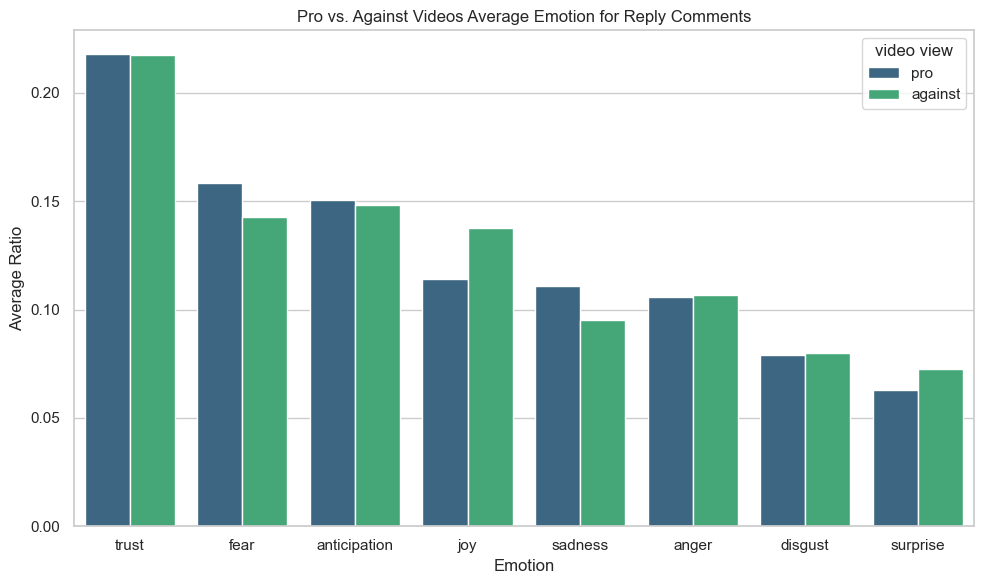

In [548]:
# Comparing Pro and Against Videos - Replies
pro_ave_reply_df['view'] = ['pro']*8
agai_ave_reply_df['view'] = ['against']*8
pro_agai_ave_reply_df = pd.concat([pro_ave_reply_df, agai_ave_reply_df])

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=pro_agai_ave_reply_df, x='index', y='value', hue='view', palette='viridis')
plt.legend(title='video view')
plt.xlabel('Emotion')
plt.ylabel('Average Ratio')
plt.title('Pro vs. Against Videos Average Emotion for Reply Comments')
plt.tight_layout()
# ax.figure.savefig("data/analysis/Emotions/Pro vs. Against Videos Average Emotion for Reply Comments.png", dpi=300)

## 3. General

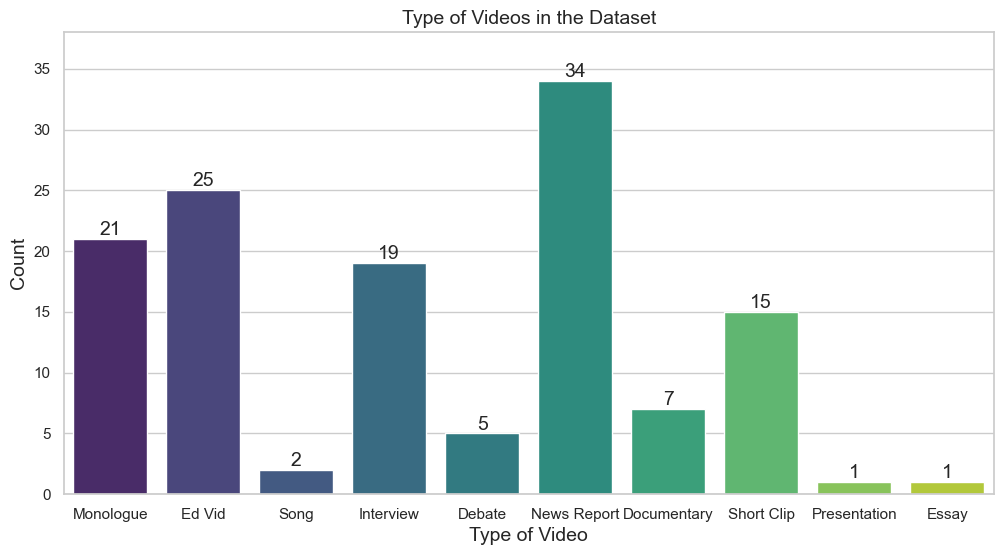

In [581]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Type", data=df, palette='viridis')
plt.title("Type of Videos in the Dataset", size=14)
plt.xlabel("Type of Video", size=14)
plt.ylabel("Count", size=14)
plt.ylim(0,38)
ax.bar_label(ax.containers[0], size=14, label_type='edge')
# ax.figure.savefig("data/analysis/General/Type of Videos in the Dataset.png", dpi=300)

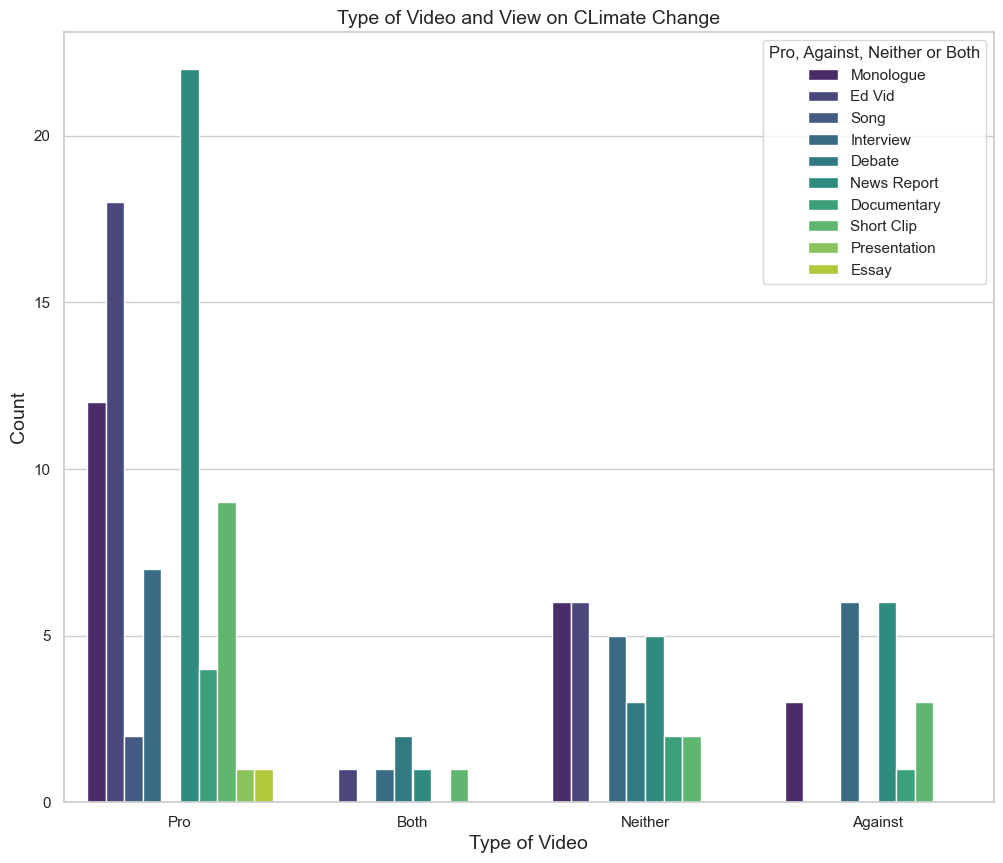

In [583]:
# sentiment distribution for both 'Pro' and 'Against' videos
plt.figure(figsize=(12, 10))
sns.countplot(data=df, x='Pro or agai', hue='Type', palette='viridis')
plt.title("Type of Video and View on CLimate Change", size=14)
plt.xlabel("Type of Video", size=14)
plt.ylabel("Count", size=14)
plt.legend(title="Pro, Against, Neither or Both", loc='upper right')
# plt.savefig("data/analysis/General/Type of Video and View on CLimate Change", dpi=300)

## 4. N-Gram

In [184]:
import re
import string
import nltk
import nltk.sentiment.util
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [554]:
def clean_text(text): 
    # remove symbols and emojis
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    # tokenize 
    text = nltk.word_tokenize(text)
    
    # lemmatize
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    
    # mark Negation
    tokens_neg_marked = nltk.sentiment.util.mark_negation(text)
    
    # remove stopwords
    text = [t for t in tokens_neg_marked
             if t.replace("_NEG", "").isalnum() and
             t.replace("_NEG", "") not in sw]
    
    return text

In [555]:
def plot_ngram(ngram, tokens, name):
    if ngram == 1:
        # create FreqDist, keep the 20 most common tokens
        freq_dist = nltk.FreqDist(tokens).most_common(20)
        # convert to Pandas series for easier plotting
        all_fdist = pd.Series(dict(freq_dist))

        fig, ax = plt.subplots(figsize=(14,10))
        bar_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
        plt.xticks(rotation=40)
        plt.xlabel('Monogram')
        plt.ylabel('Count')
        plt.title(f'Monogram Frequency Distribution for {name.capitalize()} Videos')
        plt.savefig(f'data/analysis/N-Gram/monogram_{name}.png', bbox_inches="tight", dpi=300)
        plt.close()
        # plt.show()
        
    else:
        ngram = 'bigram' if ngram == 2 else 'trigram'
        freq_dist = nltk.FreqDist(tokens)
        # sort values by highest frequency
        ngram_sorted = {k:v for k,v in sorted(freq_dist.items(), key=lambda item:item[1], reverse=True)}
        # get 20 most frequest phrases
        ngram_most_frequent = {k: ngram_sorted[k] for k in list(ngram_sorted)[:20]}

        # join ngram tokens with '_' + maintain sorting
        ngram_joined = {'_'.join(map(str, k)):v for k,v in sorted(ngram_most_frequent.items(), key=lambda item:item[1], reverse=True)}

        # convert to Pandas series for easy plotting
        ngram_freqdist = pd.Series(ngram_joined)

        fig, ax = plt.subplots(figsize=(10,10))
        bar_plot = sns.barplot(x=ngram_freqdist.values, y=ngram_freqdist.index, orient='h', ax=ax)
        plt.title(f'{ngram.capitalize()} Frequency Distribution for {name.capitalize()} Videos')
        plt.xlabel(ngram.capitalize())
        plt.ylabel('Count')
        plt.savefig(f'data/analysis/N-Gram/{ngram}_{name}.png', bbox_inches="tight", dpi=300)
        plt.close()

In [572]:
# join all words for (pro/against/neither/both) videos
all_words = []
for yt_id in tqdm(against_videos['id'].tolist()):
    comments_df = pd.read_json(f'{output_path}/{yt_id}/{yt_id}.json', lines=True)
    comments_df['cleaned_text'] = comments_df['text'].apply(lambda x: clean_text(x))

    # get list of all words in video 
    all_words = [*all_words, *comments_df['cleaned_text'].explode().to_list()]
    
monogram = [word for word in all_words if isinstance(word, str)]
bigram = nltk.bigrams(all_words)
trigram = nltk.trigrams(all_words)

100%|███████████████████████████████████████████| 19/19 [00:05<00:00,  3.26it/s]


In [260]:
view = 'pro'
plot_ngram(ngram=1, tokens=monogram, name=view)
plot_ngram(ngram=2, tokens=bigram, name=view)
plot_ngram(ngram=3, tokens=trigram, name=view)

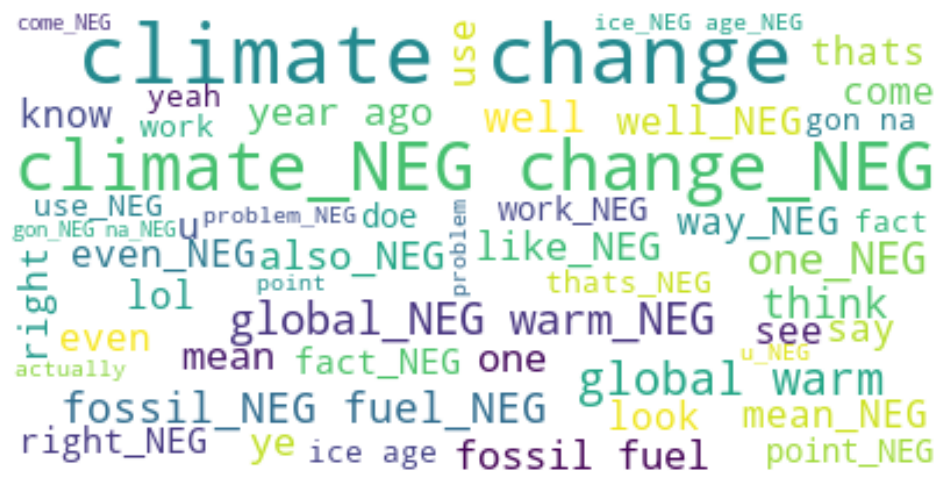

In [262]:
### Wordcloud
wordcloud = WordCloud(max_words=50, background_color="white").generate(' '.join(monogram))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# wordcloud.to_file("img/first_review.png")